In [1]:
import pandas as pd
import snap
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import copy
import numpy as np
from prettytable import PrettyTable
import mpmath
import powerlaw
import utils

In [2]:
wta_matches_files = glob.glob("data_wta/wta_matches_[0-9]*.csv")
qual_files = glob.glob("data_wta/wta_matches_qual_itf_[0-9]*.csv")

In [3]:
wta_df = utils.read_alt_files(wta_matches_files)
qual_df = utils.read_alt_files(qual_files)

c:\Anaconda2\envs\CVX\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
wta_names = set(wta_df['winner_name'].unique()).union(set(wta_df['loser_name'].unique()))
print "", len(wta_names), " different wta players"
print "", wta_df.shape[0], " wta matches"

 4272  different wta players
 103032  wta matches


In [5]:
quals_names = set(qual_df['winner_name'].unique()).union(set(qual_df['loser_name'].unique()))
print "", len(quals_names), " different quals players"
print "", qual_df.shape[0], " quals matches"

 13964  different quals players
 274108  quals matches


In [6]:
df = pd.concat([wta_df, qual_df], ignore_index=True)

In [7]:
total_names = set(df['winner_name']).union(set(df['loser_name']))
print "", len(total_names), " total players"
print "", df.shape[0], " total matches"

 15204  total players
 377140  total matches


In [8]:
names_df = pd.DataFrame()
names_df['id'] = range(len(total_names))
names_df['name'] = total_names


In [9]:
df['winner_id'] = df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
df['loser_id'] = df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

qual_df['winner_id'] = qual_df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
qual_df['loser_id'] = qual_df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

wta_df['winner_id'] = wta_df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
wta_df['loser_id'] = wta_df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

In [10]:
wtaG = utils.get_graph(wta_df)    
qualG = utils.get_graph(qual_df)    
totalG = utils.get_graph(df)
    

In [11]:
atpG = wtaG

In [12]:
atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_dists(atpG)
atp_deg_data = utils.get_deg_data(atpG)
    
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_dists(qualG)
qual_deg_data = utils.get_deg_data(qualG)
    
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_dists(totalG)
total_deg_data = utils.get_deg_data(totalG)


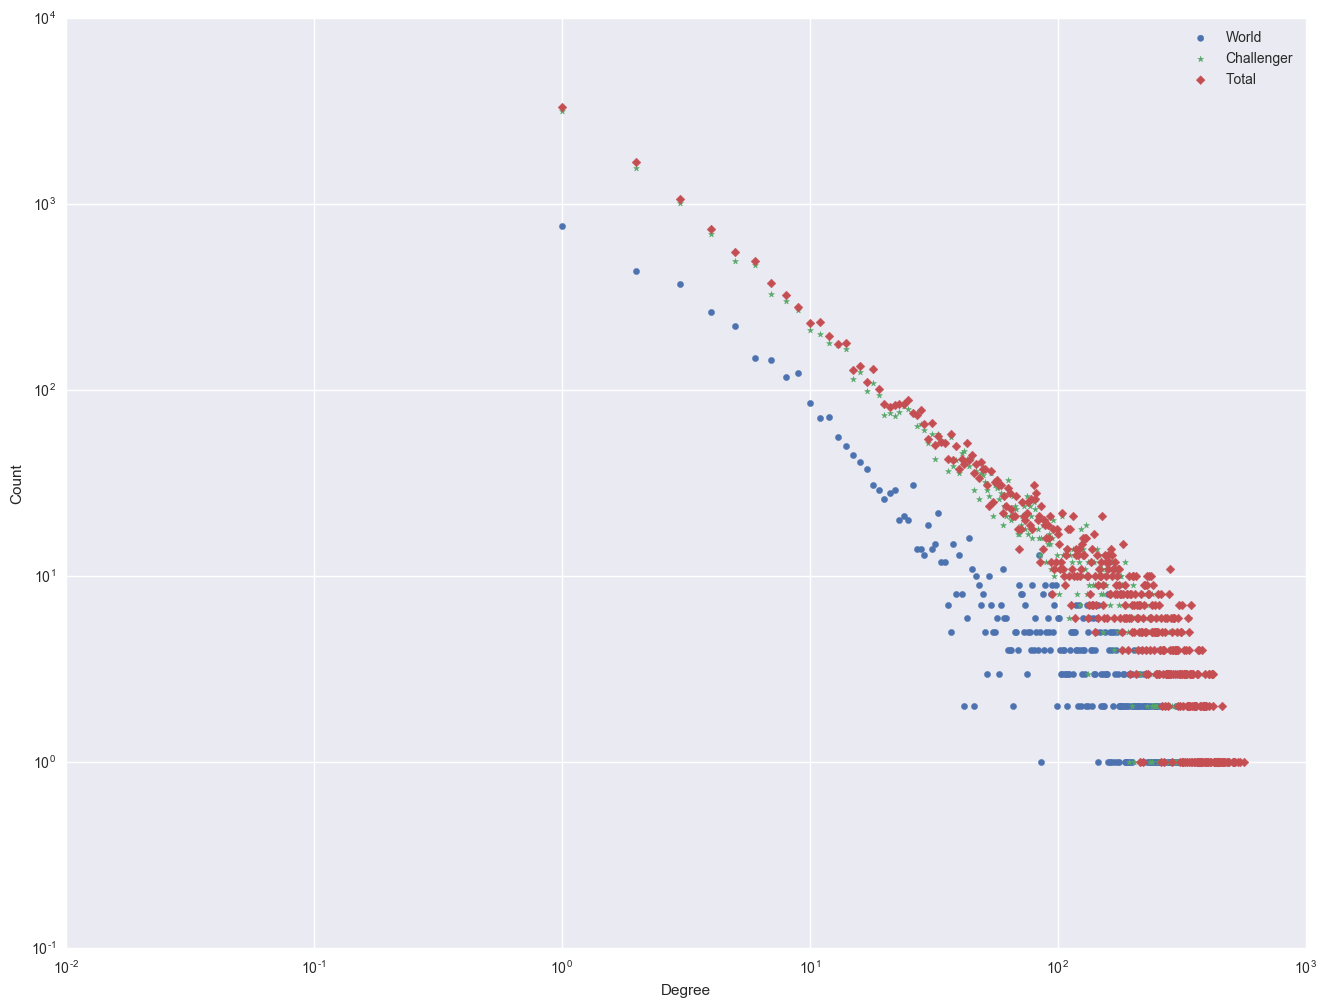

In [19]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.scatter(atp_degs, atp_deg_counts, marker='o', color=sns.color_palette()[0])
ax.scatter(qual_degs, qual_deg_counts, marker='*', color=sns.color_palette()[1])
ax.scatter(total_degs, total_deg_counts, marker="D", color=sns.color_palette()[2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Degree')
ax.legend(['World', 'Challenger', 'Total'])
plt.show()


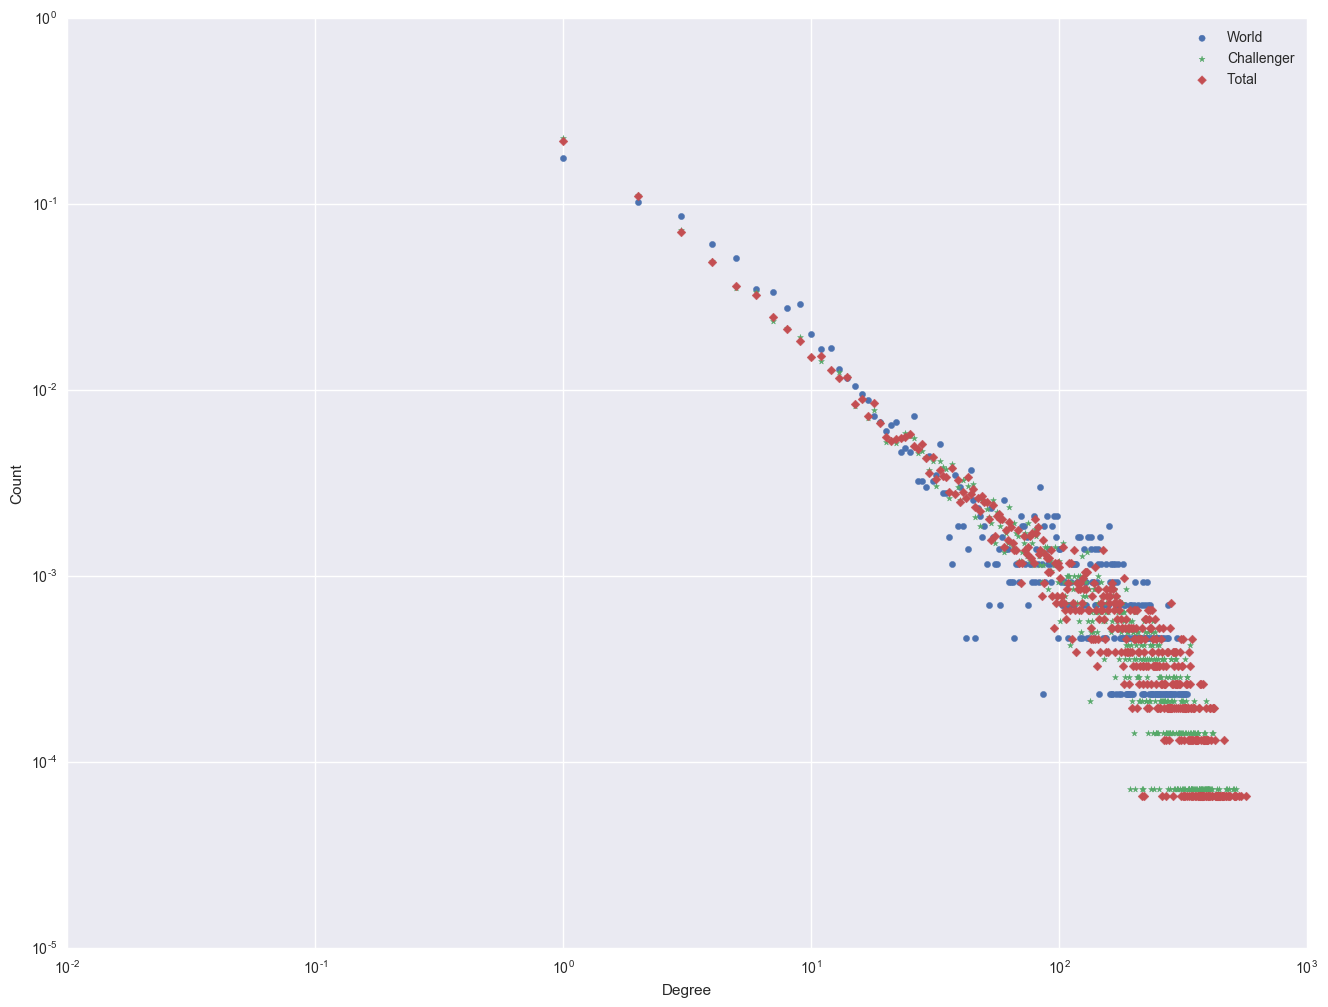

In [20]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.scatter(atp_degs, atp_pdf, marker='o', color=sns.color_palette()[0])
ax.scatter(qual_degs, qual_pdf, marker='*', color=sns.color_palette()[1])
ax.scatter(total_degs, total_pdf, marker="D", color=sns.color_palette()[2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Degree')
ax.set_ylim([1e-5, 1e0])
ax.legend(['World', 'Challenger', 'Total'])
plt.show()

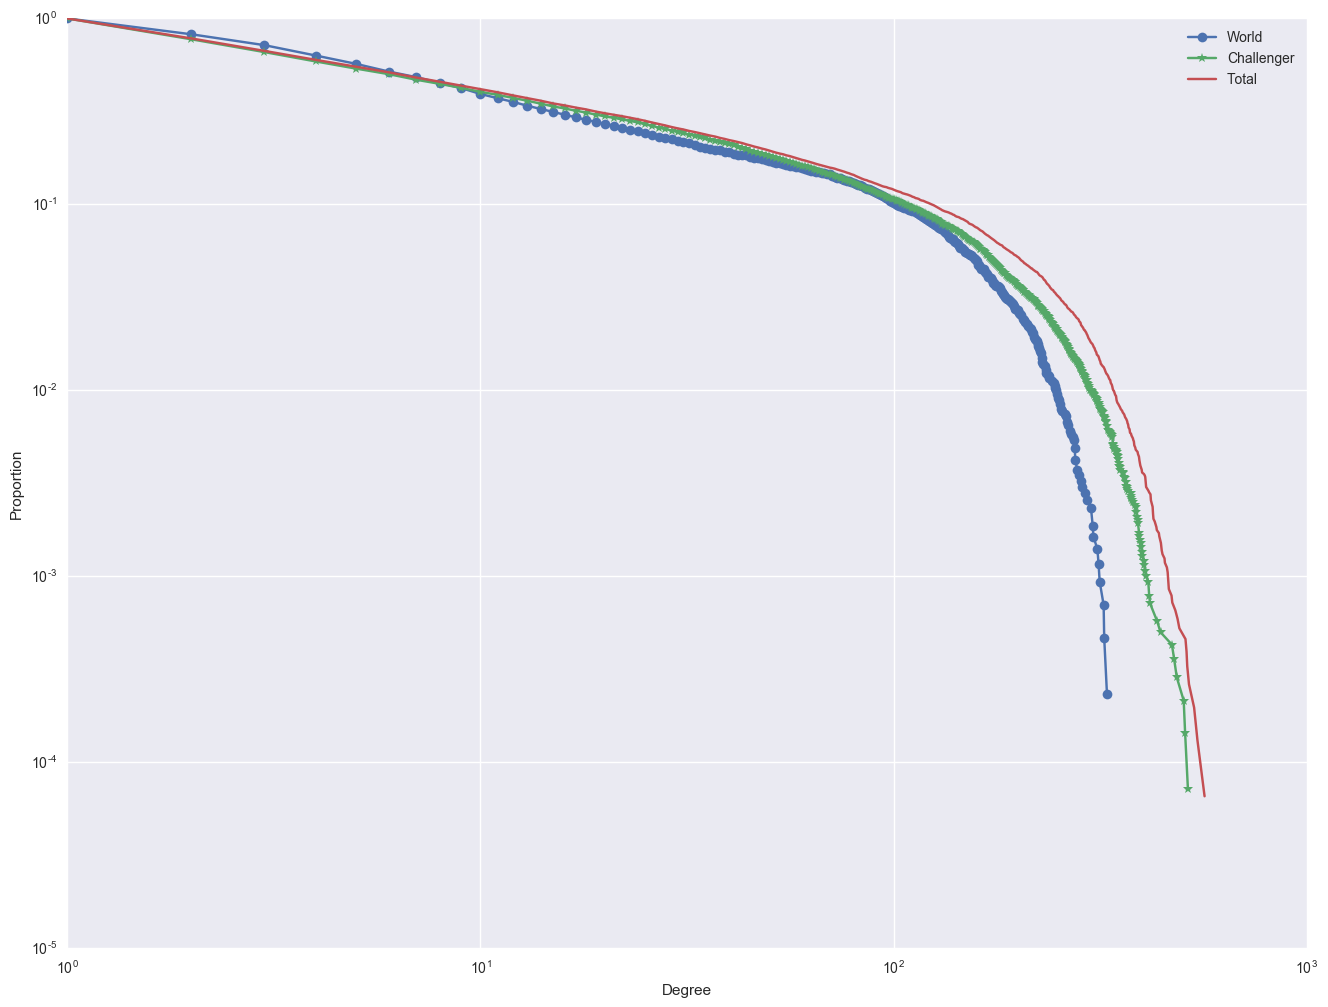

In [21]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(atp_degs, atp_ccdf[:-1], marker='o')
ax.plot(qual_degs, qual_ccdf[:-1], marker='*')
ax.plot(total_degs, total_ccdf[:-1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Degree')
ax.legend(['World', 'Challenger', 'Total'])
plt.show()

In [22]:
atp_df = wta_df

In [23]:
atp_alphas, atp_lambdas, atp_xmins, atp_years = utils.get_fit_params_by_year(atp_df)
qual_alphas, qual_lambdas, qual_xmins, qual_years = utils.get_fit_params_by_year(qual_df)
total_alphas, total_lambdas, total_xmins, total_years = utils.get_fit_params_by_year(df)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1984 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Year 2010 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1978 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1983 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1985 fitting failed with ZeroDivisionError exception
Year 1986 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1988 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1994 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Year 1984 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1995 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2002 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit


Year 2003 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2011 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


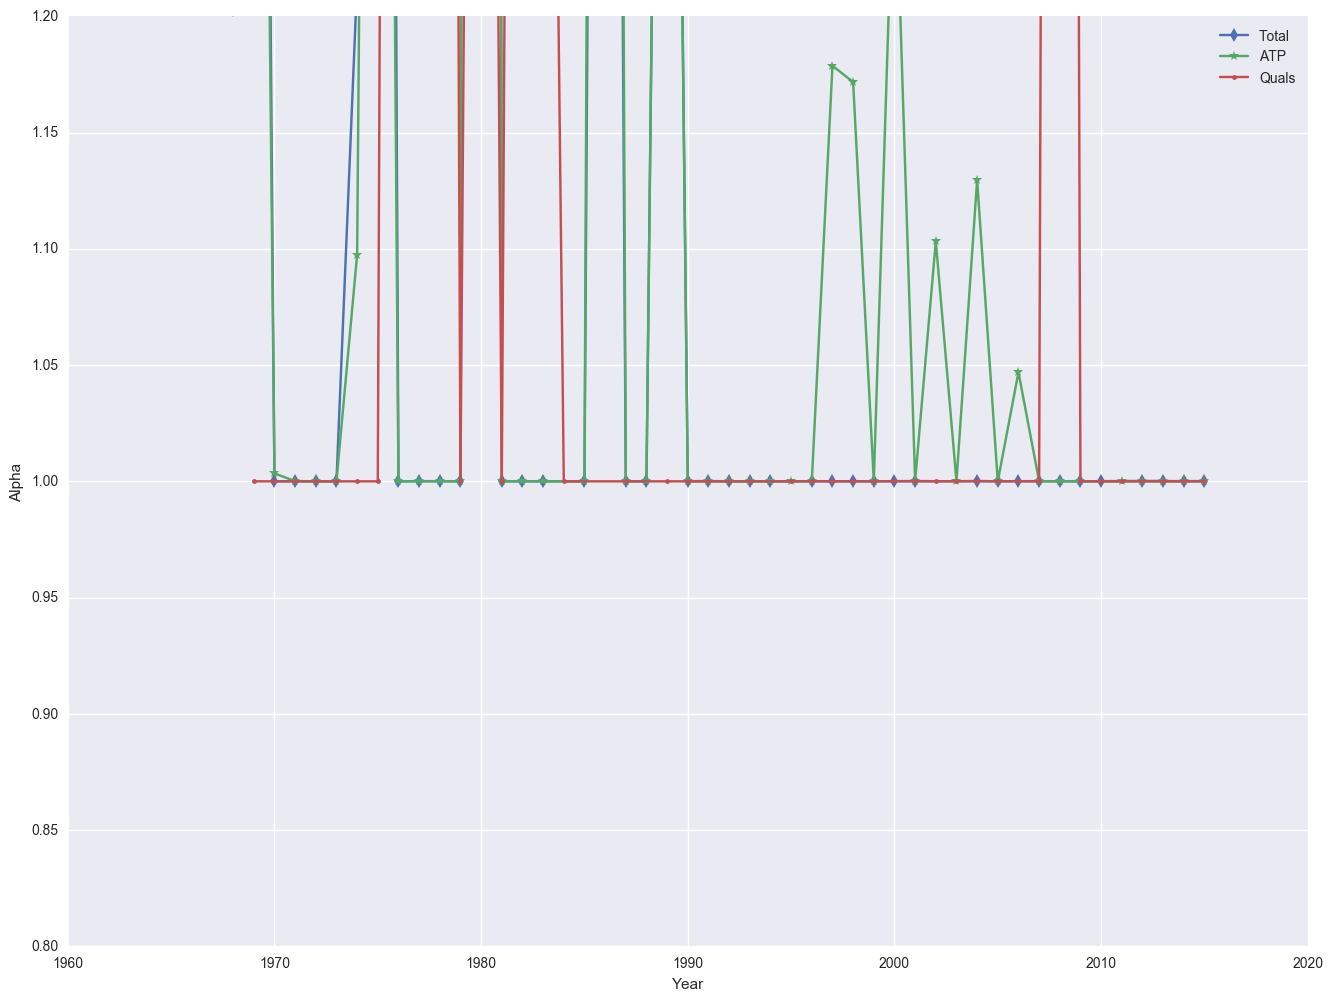

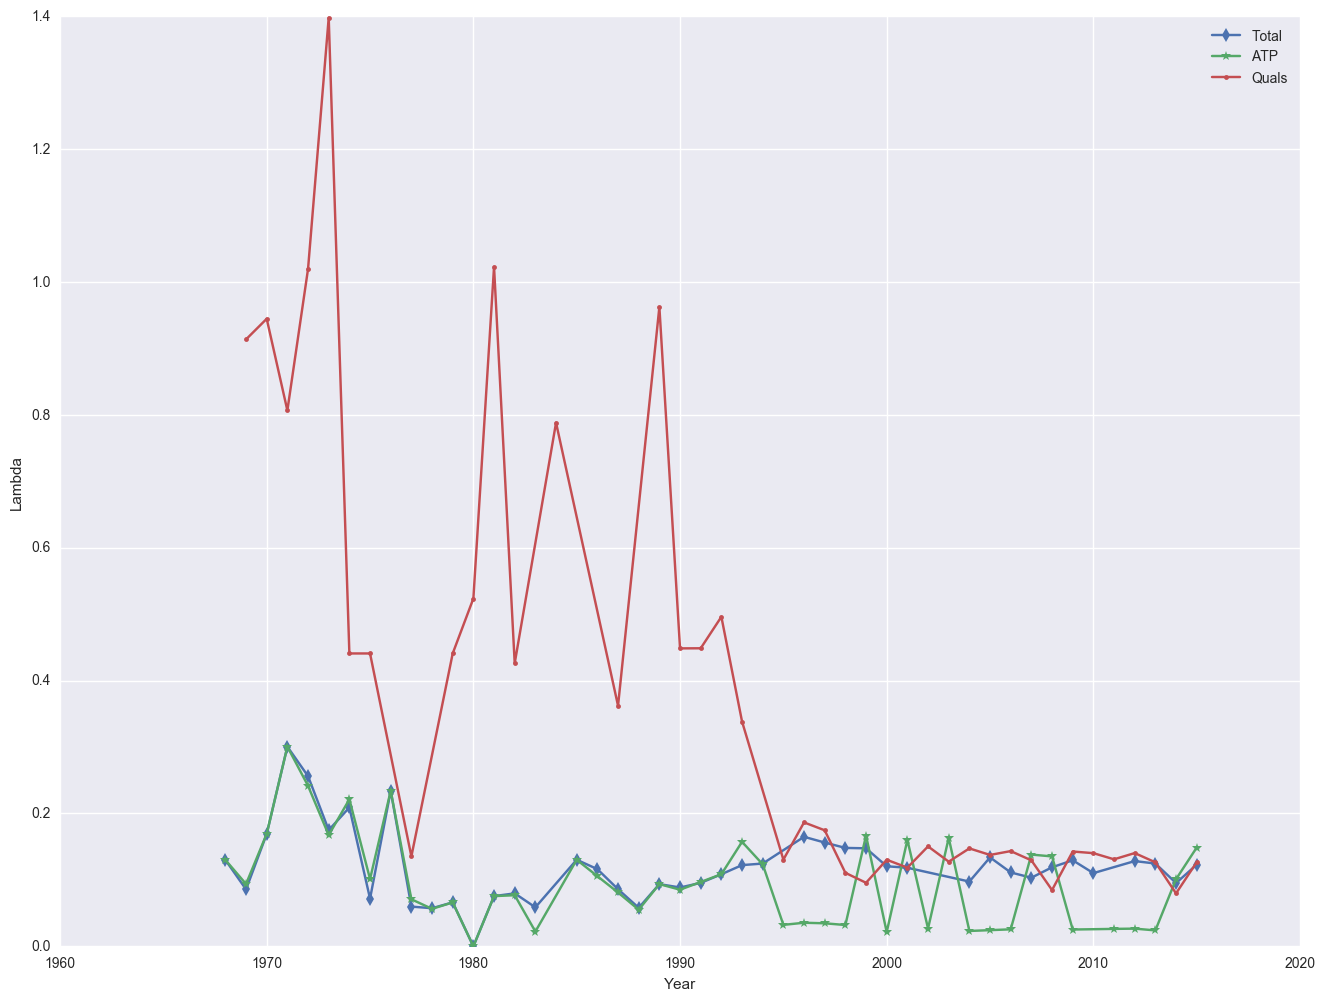

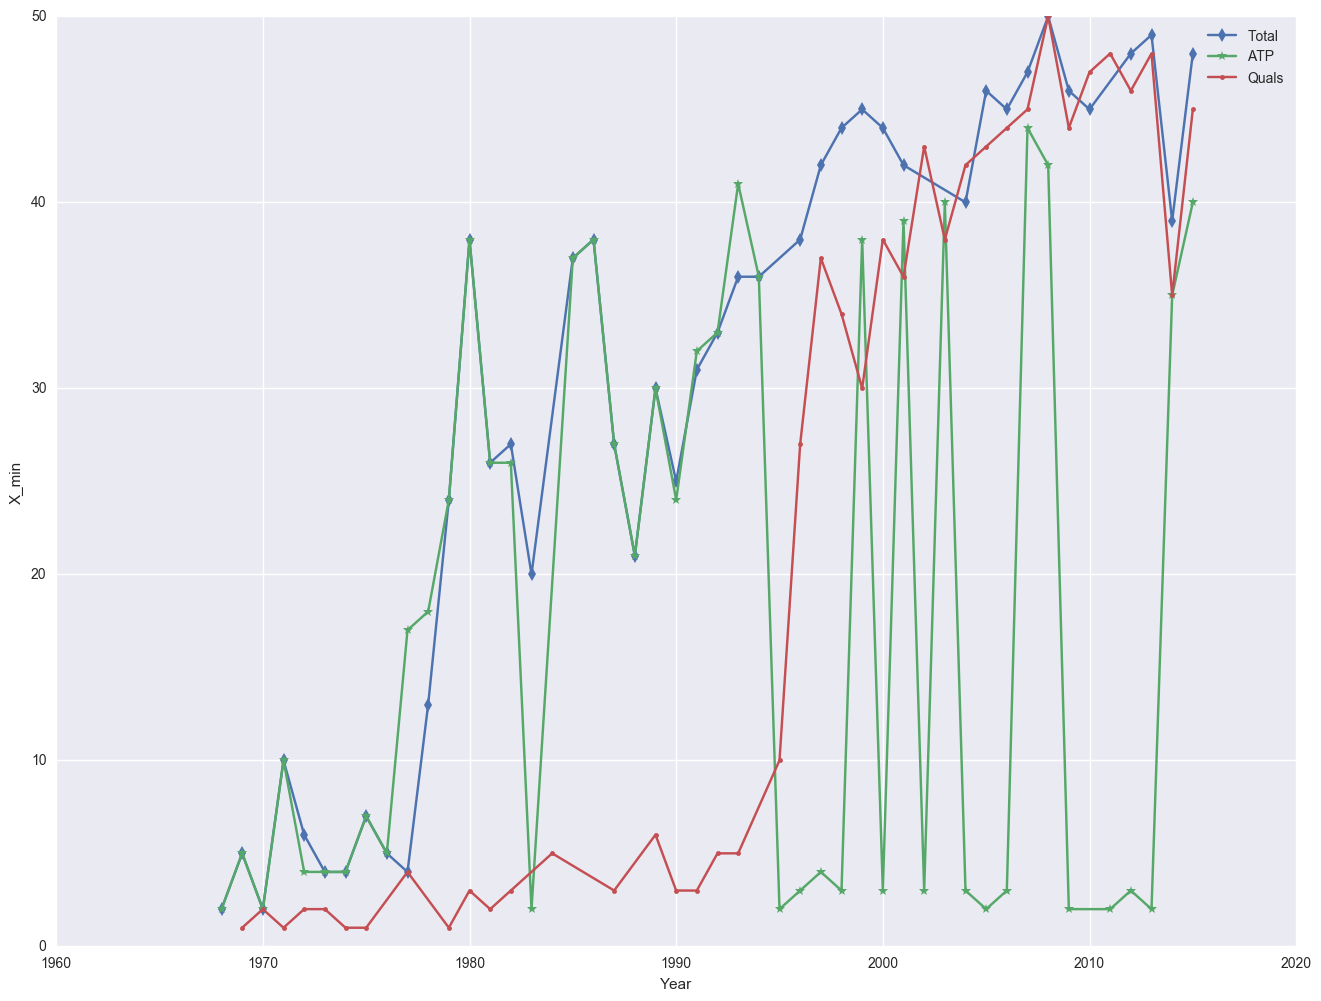

In [26]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_alphas, marker='d', label='Total')
ax.plot(atp_years, atp_alphas, marker='*', label='ATP')
ax.plot(qual_years, qual_alphas, marker='.', label='Quals')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Alpha')
ax.set_xlabel('Year')
ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_lambdas, marker='d', label='Total')
ax.plot(atp_years, atp_lambdas, marker='*', label='ATP')
ax.plot(qual_years, qual_lambdas, marker='.', label='Quals')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Lambda')
ax.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_xmins, marker='d', label='Total')
ax.plot(atp_years, atp_xmins, marker='*', label='ATP')
ax.plot(qual_years, qual_xmins, marker='.', label='Quals')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('X_min')
ax.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

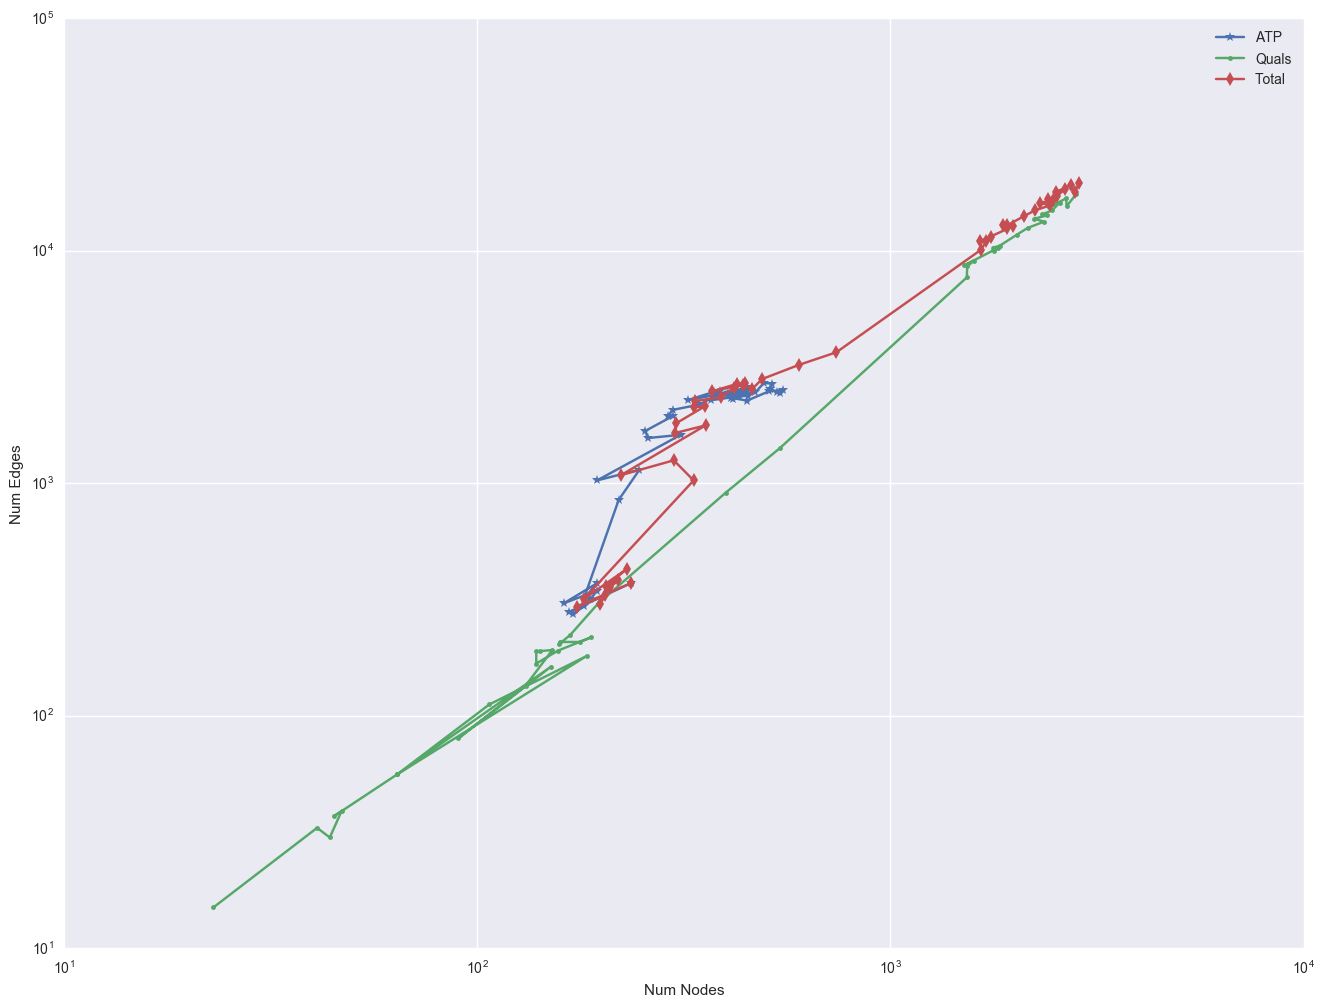

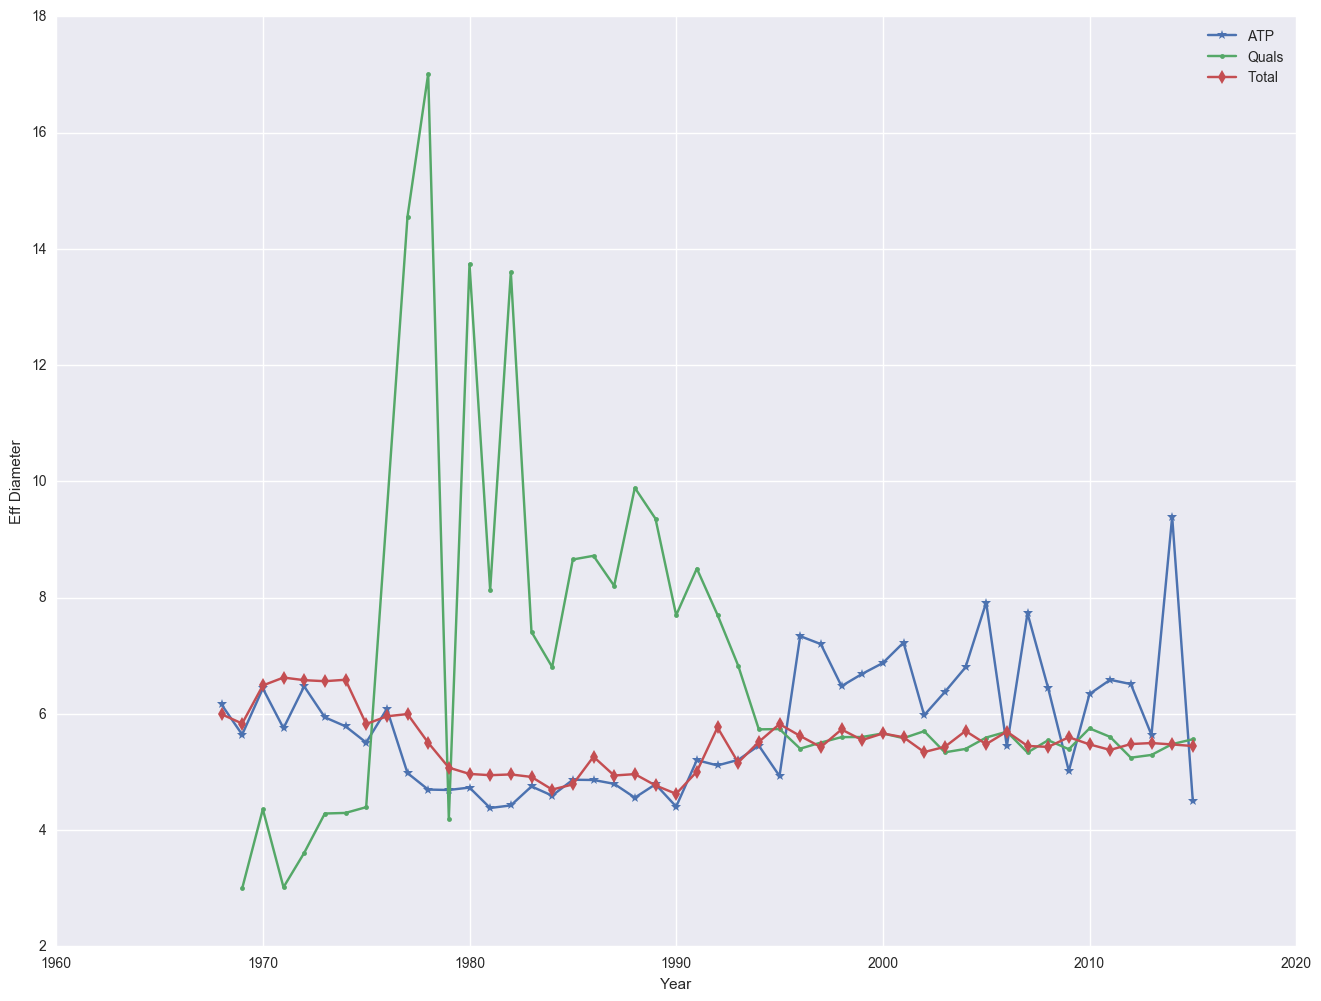

In [27]:
fig1 = plt.figure(figsize=(16,12))
# fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)

ax1.set_ylabel('Num Edges')
ax1.set_xlabel('Num Nodes')
ax2.set_ylabel('Eff Diameter')
ax2.set_xlabel('Year')
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax.set_ylim([0.8,1.2])
ax.legend()
for tempdf, name, marker in [(atp_df, 'ATP','*'), (qual_df, 'Quals','.'), (df, 'Total','d')]:
    N, E, D, years = utils.get_densification(tempdf)
    ax1.plot(N, E, label=name, marker=marker)
    ax2.plot(years, D, label=name, marker=marker)


ax1.legend()
ax2.legend()
plt.show()

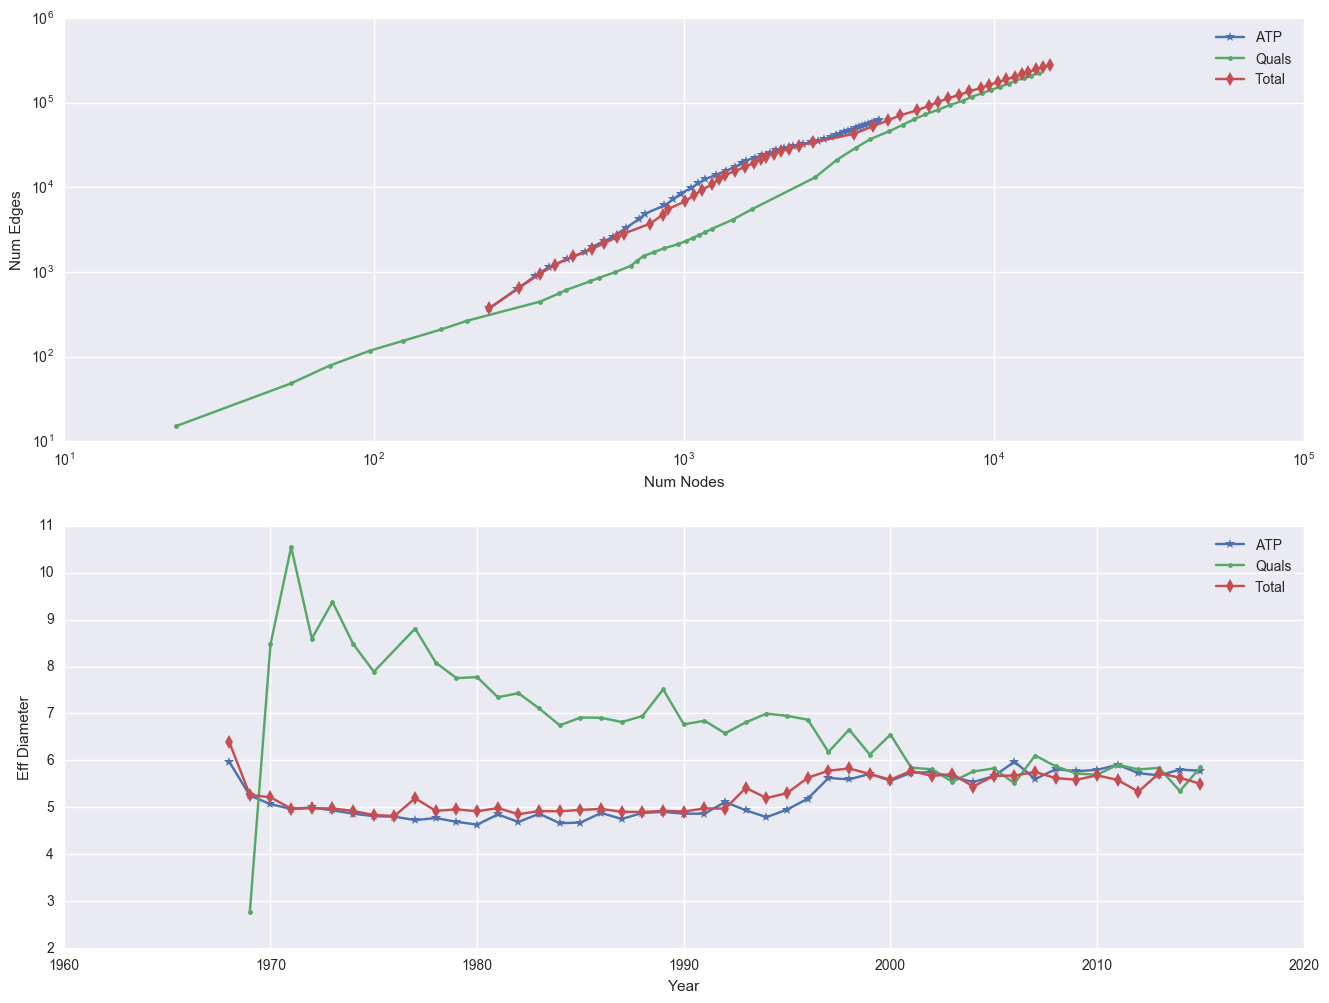

In [60]:
fig1 = plt.figure(figsize=(16,12))
# fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)

ax1.set_ylabel('Num Edges')
ax1.set_xlabel('Num Nodes')
ax2.set_ylabel('Eff Diameter')
ax2.set_xlabel('Year')
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax.set_ylim([0.8,1.2])
ax.legend()
for tempdf, name, marker in [(atp_df, 'ATP','*'), (qual_df, 'Quals','.'), (df, 'Total','d')]:
    N, E, D, years = utils.cumulative_get_densification(tempdf)
    ax1.plot(N, E, label=name, marker=marker)
    ax2.plot(years, D, label=name, marker=marker)


ax1.legend()
ax2.legend()
plt.show()

In [43]:
reload(utils)

<module 'utils' from 'utils.py'>

Calculating best minimal value for power law fit


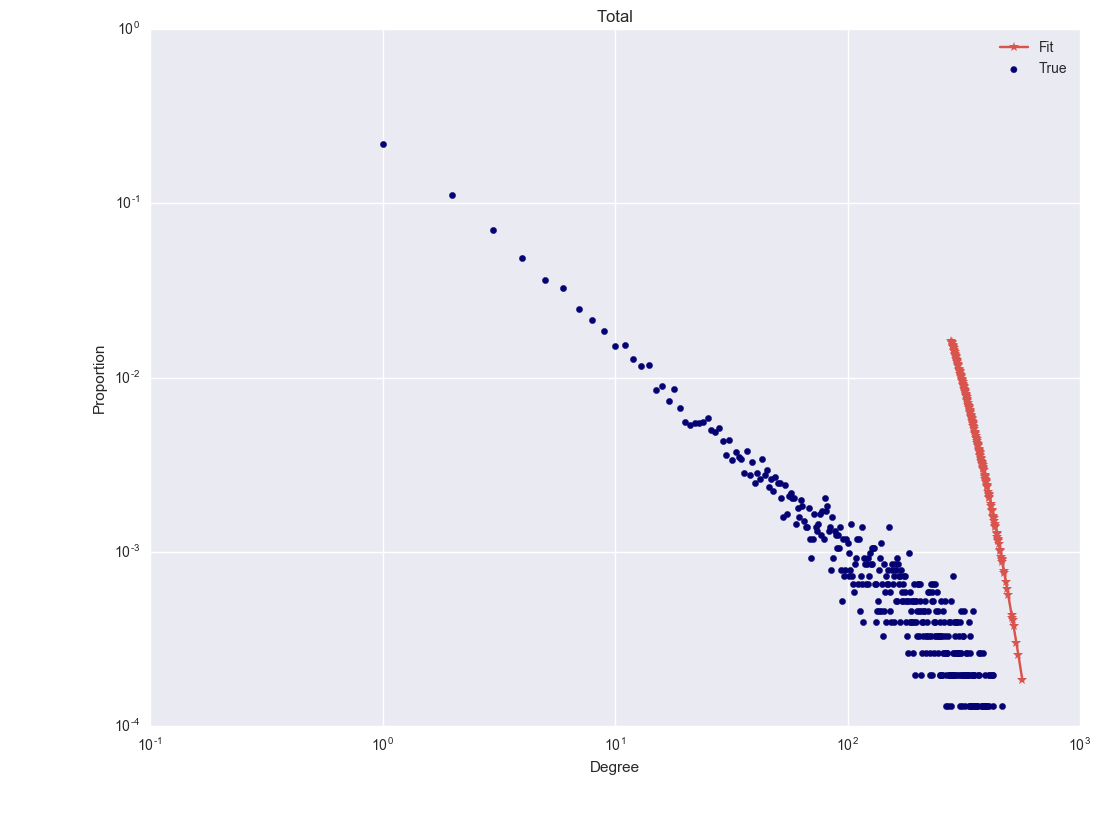

Calculating best minimal value for power law fit


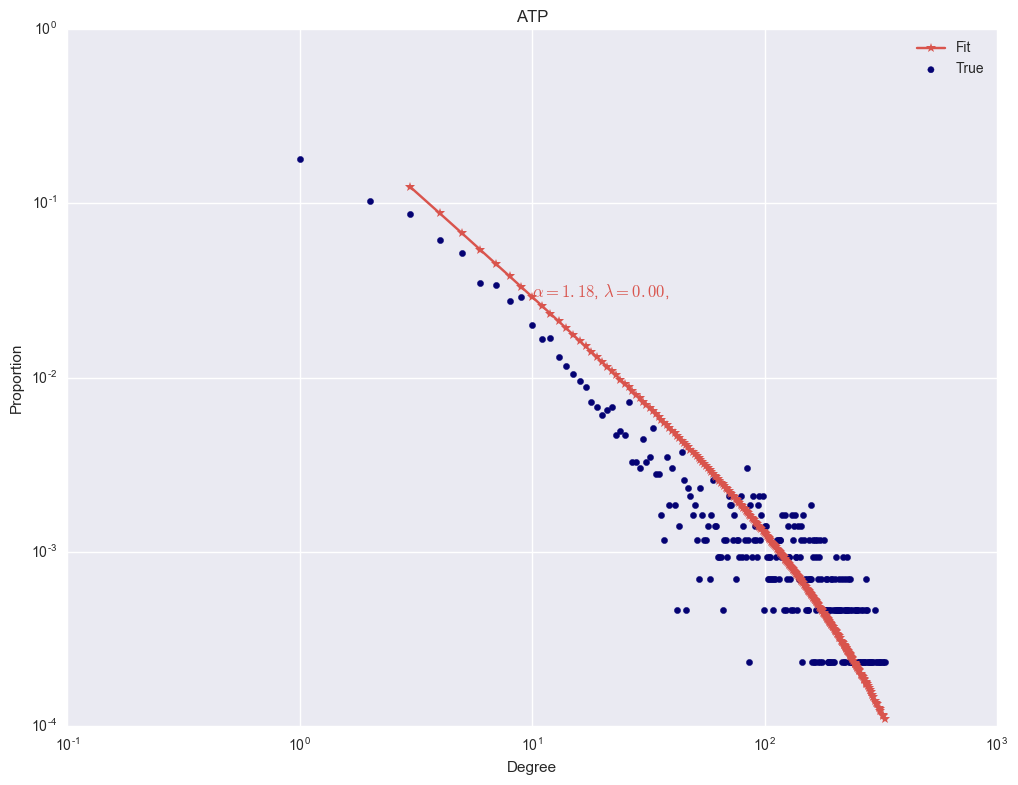

Calculating best minimal value for power law fit


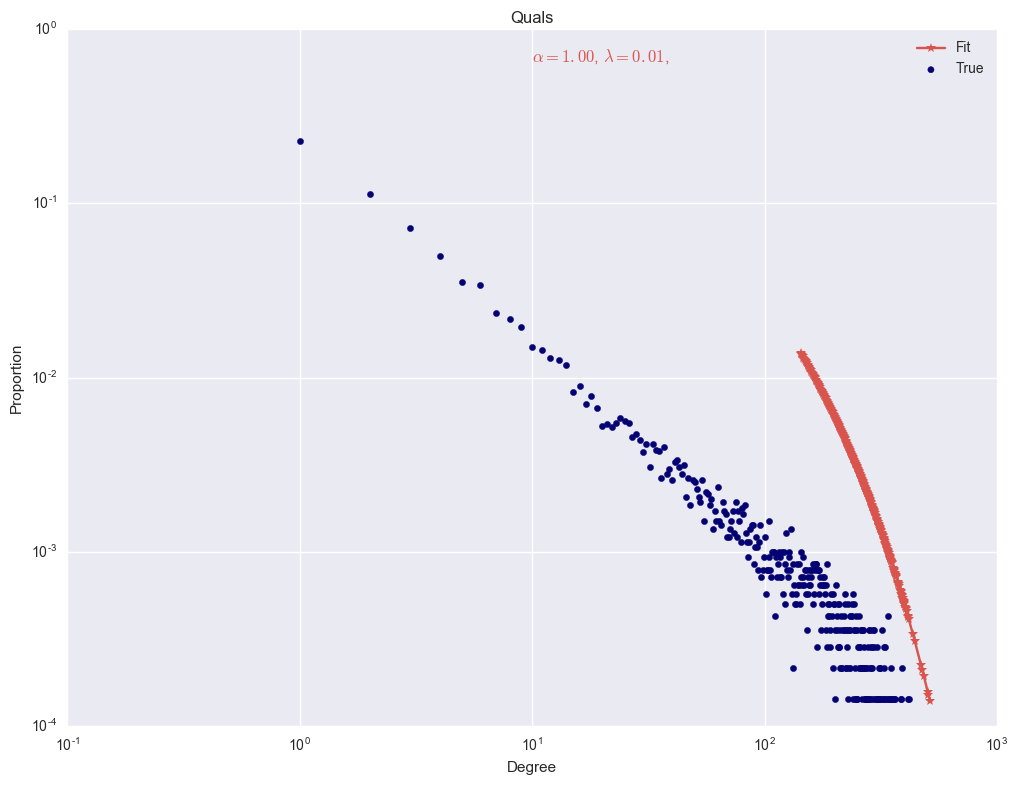

In [24]:
total_alpha, total_lambda, total_xmin,_ = utils.fit_truncated(total_deg_data)
utils.plot_fit(total_alpha, total_lambda, total_xmin, total_pdf, total_ccdf, total_degs, title="Total")

atp_alpha, atp_lambda, atp_xmin,_ = utils.fit_truncated(atp_deg_data)
utils.plot_fit(atp_alpha, atp_lambda, atp_xmin, atp_pdf, atp_ccdf, atp_degs, title="ATP")

qual_alpha, qual_lambda, qual_xmin,_ = utils.fit_truncated(qual_deg_data)
utils.plot_fit(qual_alpha, qual_lambda, qual_xmin, qual_pdf, qual_ccdf, qual_degs, title="Quals")

In [30]:
atp_deg_df = utils.get_deg_info(atpG, names_df)
qual_deg_df = utils.get_deg_info(qualG, names_df)
total_deg_df = utils.get_deg_info(totalG, names_df)

In [31]:
total_deg_df[total_deg_df['deg'] >= 200].sort_values("deg", ascending=False).head()

,id,deg,name
2576,12330,565,Stephanie Foretz Gacon
3034,11067,543,Maria Fernanda Alves
2995,820,533,Renata Voracova
2858,13388,518,Alberta Brianti
2756,1507,513,Yuliya Beygelzimer


In [32]:
atp_deg_df[atp_deg_df['name'].str.contains('ederer')]

,id,deg,name


In [33]:
print "--------------------ATP--------------------"
utils.print_fit_results(atp_deg_data, True)
print 
print

print "--------------------Qual--------------------"
utils.print_fit_results(qual_deg_data, True)
print 
print

print "--------------------Total--------------------"
utils.print_fit_results(total_deg_data, True)
print 
print

--------------------ATP--------------------
alpha: 1.5428155513
x_min: 3.0
Number of Data Points: 4272


Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+---------------+---------------+---------------+-------------------+-----------------------+
|                       |     power     |   lognormal   |  exponential  | power with cutoff | stretched exponential |
+-----------------------+---------------+---------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000  | -188.09,0.000 |  796.63,0.000 |   -273.84,0.000   |     -220.20,0.000     |
|   lognormal_positive  |  188.09,0.000 |   0.00,1.000  |  984.72,0.000 |    -85.75,0.000   |      -32.12,0.000     |
|      exponential      | -796.63,0.000 | -984.72,0.000 |   0.00,1.000  |   -1070.47,0.000  |     -1016.83,0.000    |
|  truncated_power_law  |  273.84,0.000 |  85.75,0.000  | 1070.47,0.000 |     0.00,1.000    |      53.63,0.000      |
| stretched_exponential |  220.20,0.000 |  32.12,0.000  | 1016.83,0.000 |    -53.63,0.000   |       0.00,1.000      |
+-----------------------+---------------+---------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+--------------+--------------+-------------------+-----------------------+
|                       |    power    |  lognormal   | exponential  | power with cutoff | stretched exponential |
+-----------------------+-------------+--------------+--------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -75.67,0.000 | -70.94,0.000 |    -60.33,0.000   |      -82.55,0.000     |
|   lognormal_positive  | 75.67,0.000 |  0.00,1.000  |  4.73,0.212  |    15.35,0.004    |      -6.87,0.000      |
|      exponential      | 70.94,0.000 | -4.73,0.212  |  0.00,1.000  |    10.61,0.000    |      -11.61,0.000     |
|  truncated_power_law  | 60.33,0.000 | -15.35,0.004 | -10.61,0.000 |     0.00,1.000    |      -22.22,0.000     |
| stretched_exponential | 82.55,0.000 |  6.87,0.000  | 11.61,0.000  |    22.22,0.000    |       0.00,1.000      |
+-----------------------+-------------+--------------+--------------+-------------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions

+-----------------------+-------------+--------------+--------------+-------------------+-----------------------+
|                       |    power    |  lognormal   | exponential  | power with cutoff | stretched exponential |
+-----------------------+-------------+--------------+--------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -14.75,0.001 | -11.23,0.000 |    -10.11,0.000   |      -15.66,0.000     |
|   lognormal_positive  | 14.75,0.001 |  0.00,1.000  |  3.52,0.149  |     4.64,0.090    |      -0.91,0.088      |
|      exponential      | 11.23,0.000 | -3.52,0.149  |  0.00,1.000  |     1.13,0.000    |      -4.43,0.003      |
|  truncated_power_law  | 10.11,0.000 | -4.64,0.090  | -1.13,0.000  |     0.00,1.000    |      -5.55,0.048      |
| stretched_exponential | 15.66,0.000 |  0.91,0.088  |  4.43,0.003  |     5.55,0.048    |       0.00,1.000      |
+-----------------------+-------------+--------------+--------------+-------------------


Assuming nested distributions


In [34]:
def get_directed_graph(df):
    G = snap.TNEANet.New()
    ids = set()
    for _, row in df.iterrows():
        winner_id = row['winner_id']
        loser_id = row['loser_id']
        ids.add(winner_id)
        ids.add(loser_id)
        if not(G.IsNode(winner_id)):
            G.AddNode(winner_id)
        if not G.IsNode(loser_id):
            G.AddNode(loser_id)
        G.AddEdge(loser_id, winner_id)
    return G

def get_in_dists(G):
    deg_counts = []
    degs = []
    deg_vect = snap.TIntPrV()
    snap.GetInDegCnt(G, deg_vect)
    for item in deg_vect:
        deg = item.GetVal1()
        cnt = item.GetVal2()
        deg_counts.append(cnt)
        degs.append(deg)

    out_deg = []
    out_counts = []
    cur_deg = min(degs)
    for deg, cnt in zip(degs, deg_counts):
        while cur_deg < deg:
            out_deg.append(cur_deg)
            out_counts.append(0)
            cur_deg += 1
        out_deg.append(deg)
        out_counts.append(cnt)
        cur_deg += 1

    deg_counts = np.asarray(out_counts)
    degs = np.asarray(out_deg)
    pdf = deg_counts.astype(float) / sum(deg_counts)
    cdf = np.cumsum(pdf)
    cdf = np.insert(cdf, 0, 0)
    ccdf = 1 - cdf
    return deg_counts, degs, cdf, ccdf, pdf


def get_in_deg_data(G):
    deg_data = []
    for node in G.Nodes():
        deg_data.append(node.GetInDeg())
    return deg_data

def get_out_dists(G):
    deg_counts = []
    degs = []
    deg_vect = snap.TIntPrV()
    snap.GetOutDegCnt(G, deg_vect)
    for item in deg_vect:
        deg = item.GetVal1()
        cnt = item.GetVal2()
        deg_counts.append(cnt)
        degs.append(deg)

    out_deg = []
    out_counts = []
    cur_deg = min(degs)
    for deg, cnt in zip(degs, deg_counts):
        while cur_deg < deg:
            out_deg.append(cur_deg)
            out_counts.append(0)
            cur_deg += 1
        out_deg.append(deg)
        out_counts.append(cnt)
        cur_deg += 1

    deg_counts = np.asarray(out_counts)
    degs = np.asarray(out_deg)
    pdf = deg_counts.astype(float) / sum(deg_counts)
    cdf = np.cumsum(pdf)
    cdf = np.insert(cdf, 0, 0)
    ccdf = 1 - cdf
    return deg_counts, degs, cdf, ccdf, pdf


def get_out_deg_data(G):
    deg_data = []
    for node in G.Nodes():
        deg_data.append(node.GetOutDeg())
    return deg_data

In [35]:
test_directed_graph = get_directed_graph(atp_df)
print()
print("In-Degree")
in_deg_data = get_in_deg_data(test_directed_graph)
utils.print_fit_results(in_deg_data, True)

print()
print("Out-Degree")
out_deg_data = get_out_deg_data(test_directed_graph)
utils.print_fit_results(out_deg_data, True)

()
In-Degree
alpha: 4.89008231073
x_min: 441.0
Number of Data Points: 4272


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|                       |    power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -0.20,0.683 |  0.01,0.993 |    -0.23,0.500    |      -0.21,0.672      |
|   lognormal_positive  |  0.20,0.683 |  0.00,1.000 |  0.21,0.730 |    -0.02,0.622    |      -0.01,0.654      |
|      exponential      | -0.01,0.993 | -0.21,0.730 |  0.00,1.000 |    -0.24,0.705    |      -0.22,0.503      |
|  truncated_power_law  |  0.23,0.500 |  0.02,0.622 |  0.24,0.705 |     0.00,1.000    |       0.01,0.712      |
| stretched_exponential |  0.21,0.672 |  0.01,0.654 |  0.22,0.503 |    -0.01,0.712    |       0.00,1.000      |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -1.68,0.224 | -1.75,0.084 |    -1.62,0.072    |      -1.96,0.202      |
|   lognormal_positive  | 1.68,0.224 |  0.00,1.000 | -0.06,0.874 |     0.06,0.909    |      -0.28,0.144      |
|      exponential      | 1.75,0.084 |  0.06,0.874 |  0.00,1.000 |     0.12,0.422    |      -0.22,0.508      |
|  truncated_power_law  | 1.62,0.072 | -0.06,0.909 | -0.12,0.422 |     0.00,1.000    |      -0.34,0.617      |
| stretched_exponential | 1.96,0.202 |  0.28,0.144 |  0.22,0.508 |     0.34,0.617    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+


Assuming nested distributions


In [36]:
test_directed_graph = get_directed_graph(df)
print()
print("In-Degree")
in_deg_data = get_in_deg_data(test_directed_graph)
utils.print_fit_results(in_deg_data, True)

print()
print("Out-Degree")
out_deg_data = get_out_deg_data(test_directed_graph)
utils.print_fit_results(out_deg_data, True)

print()
print("Degree")
deg_data = utils.get_deg_data(test_directed_graph)
utils.print_fit_results(deg_data, True)

()
In-Degree
alpha: 4.69586933191
x_min: 293.0
Number of Data Points: 15204


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|                       |    power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -1.44,0.334 |  0.59,0.876 |    -1.46,0.087    |      -1.46,0.329      |
|   lognormal_positive  |  1.44,0.334 |  0.00,1.000 |  2.03,0.387 |    -0.02,0.911    |      -0.02,0.840      |
|      exponential      | -0.59,0.876 | -2.03,0.387 |  0.00,1.000 |    -2.05,0.379    |      -2.05,0.043      |
|  truncated_power_law  |  1.46,0.087 |  0.02,0.911 |  2.05,0.379 |     0.00,1.000    |       0.00,0.975      |
| stretched_exponential |  1.46,0.329 |  0.02,0.840 |  2.05,0.043 |    -0.00,0.975    |       0.00,1.000      |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -8.60,0.009 | -6.66,0.000 |    -5.98,0.001    |      -9.27,0.006      |
|   lognormal_positive  | 8.60,0.009 |  0.00,1.000 |  1.94,0.282 |     2.62,0.198    |      -0.67,0.071      |
|      exponential      | 6.66,0.000 | -1.94,0.282 |  0.00,1.000 |     0.68,0.005    |      -2.61,0.022      |
|  truncated_power_law  | 5.98,0.001 | -2.62,0.198 | -0.68,0.005 |     0.00,1.000    |      -3.29,0.113      |
| stretched_exponential | 9.27,0.006 |  0.67,0.071 |  2.61,0.022 |     3.29,0.113    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -6.72,0.027 | -6.27,0.002 |    -5.75,0.001    |      -6.92,0.027      |
|   lognormal_positive  | 6.72,0.027 |  0.00,1.000 |  0.45,0.664 |     0.97,0.480    |      -0.20,0.652      |
|      exponential      | 6.27,0.002 | -0.45,0.664 |  0.00,1.000 |     0.53,0.150    |      -0.65,0.254      |
|  truncated_power_law  | 5.75,0.001 | -0.97,0.480 | -0.53,0.150 |     0.00,1.000    |      -1.18,0.419      |
| stretched_exponential | 6.92,0.027 |  0.20,0.652 |  0.65,0.254 |     1.18,0.419    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+


Assuming nested distributions


Calculating best minimal value for power law fit


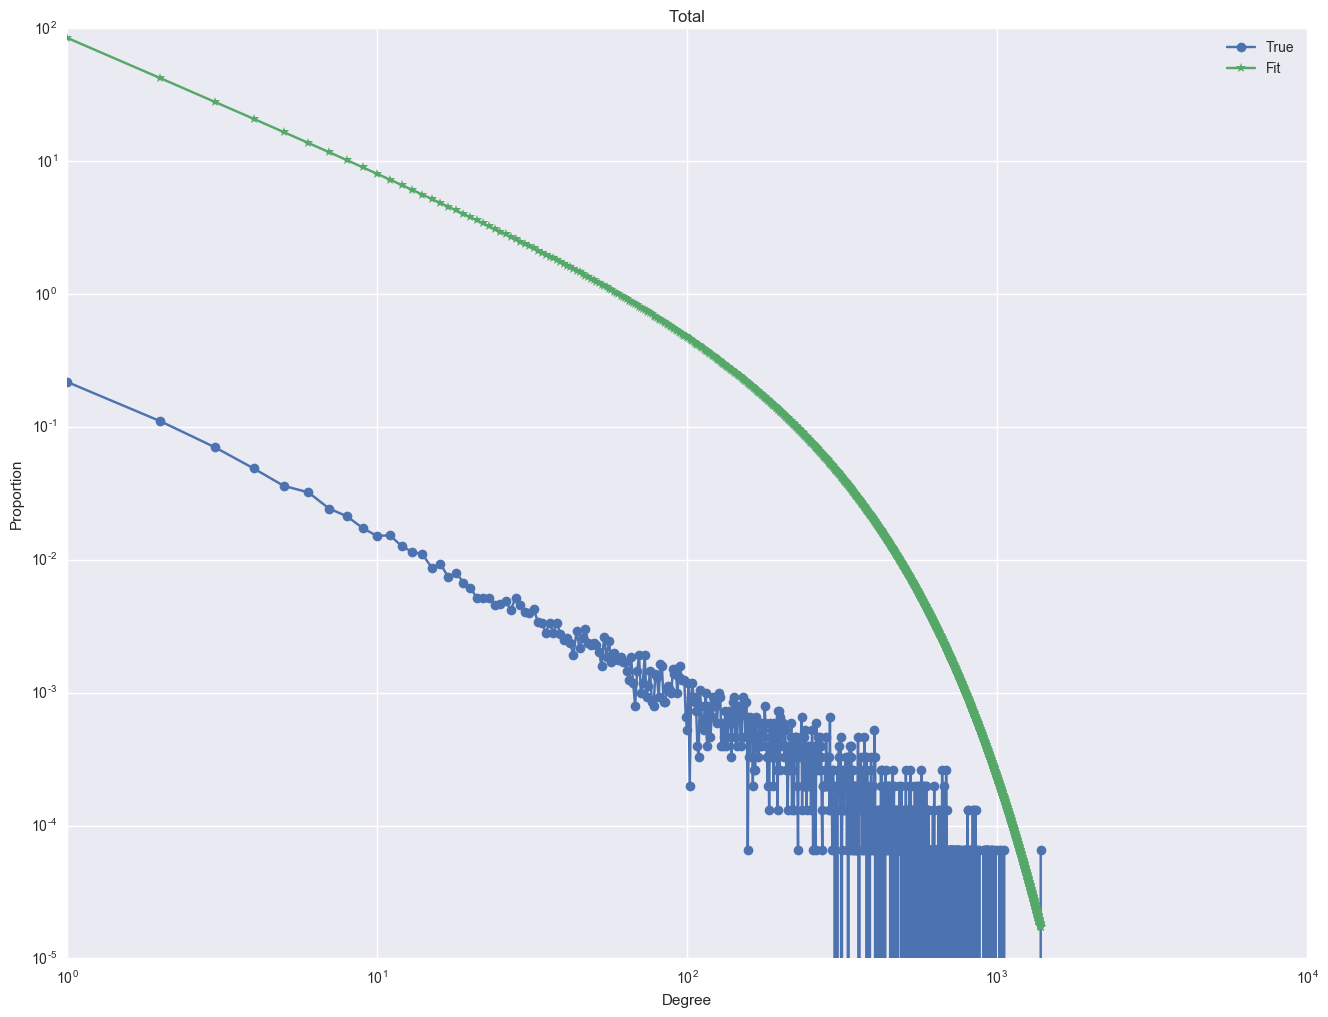

In [37]:
deg_data = np.asarray(utils.get_deg_data(test_directed_graph))
test_deg_counts, test_degs, test_cdf, test_ccdf, test_pdf = utils.get_dists(test_directed_graph)
test_alpha, test_lambda, test_xmin,_ = utils.fit_truncated(deg_data)
utils.plot_fit(test_alpha, test_lambda, test_xmin, test_pdf, test_ccdf, test_degs, title="Total")

In [38]:
test_ccdf.shape

(1384L,)

Calculating best minimal value for power law fit


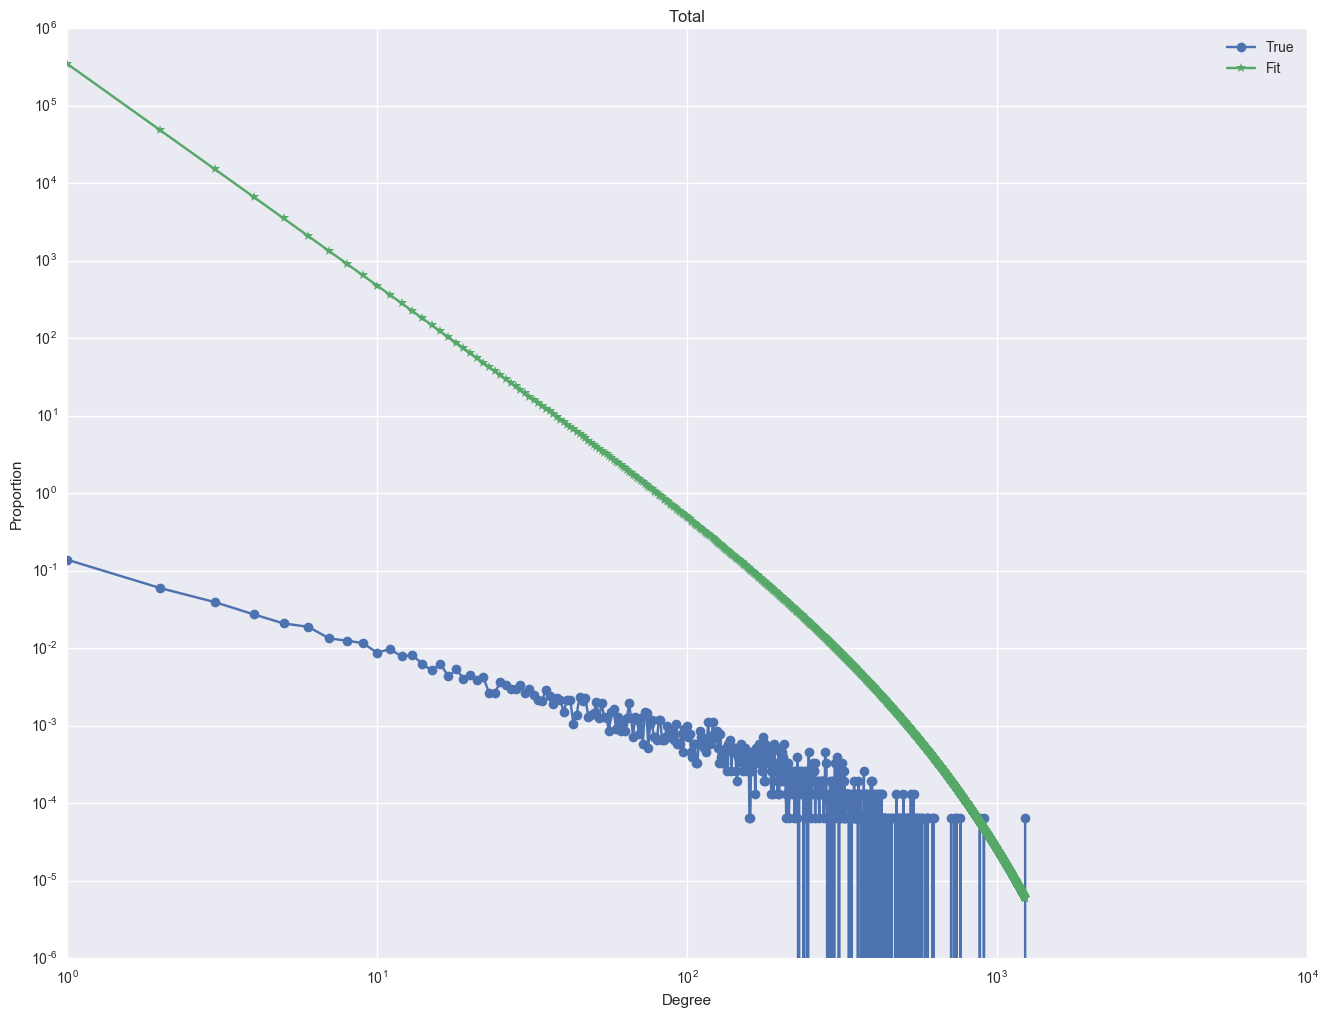

In [39]:
in_deg_data = np.asarray(get_in_deg_data(test_directed_graph))
in_deg_data = in_deg_data[in_deg_data > 0]
test_deg_counts, test_degs, test_cdf, test_ccdf, test_pdf = get_in_dists(test_directed_graph)
test_deg_counts = test_deg_counts[1:]
test_degs = test_degs[1:]
test_cdf = test_cdf[1:]
test_ccdf = test_ccdf[1:]
test_pdf = test_pdf[1:]
test_alpha, test_lambda, test_xmin,_ = utils.fit_truncated(in_deg_data)
utils.plot_fit(test_alpha, test_lambda, test_xmin, test_pdf, test_ccdf, test_degs, title="Total")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


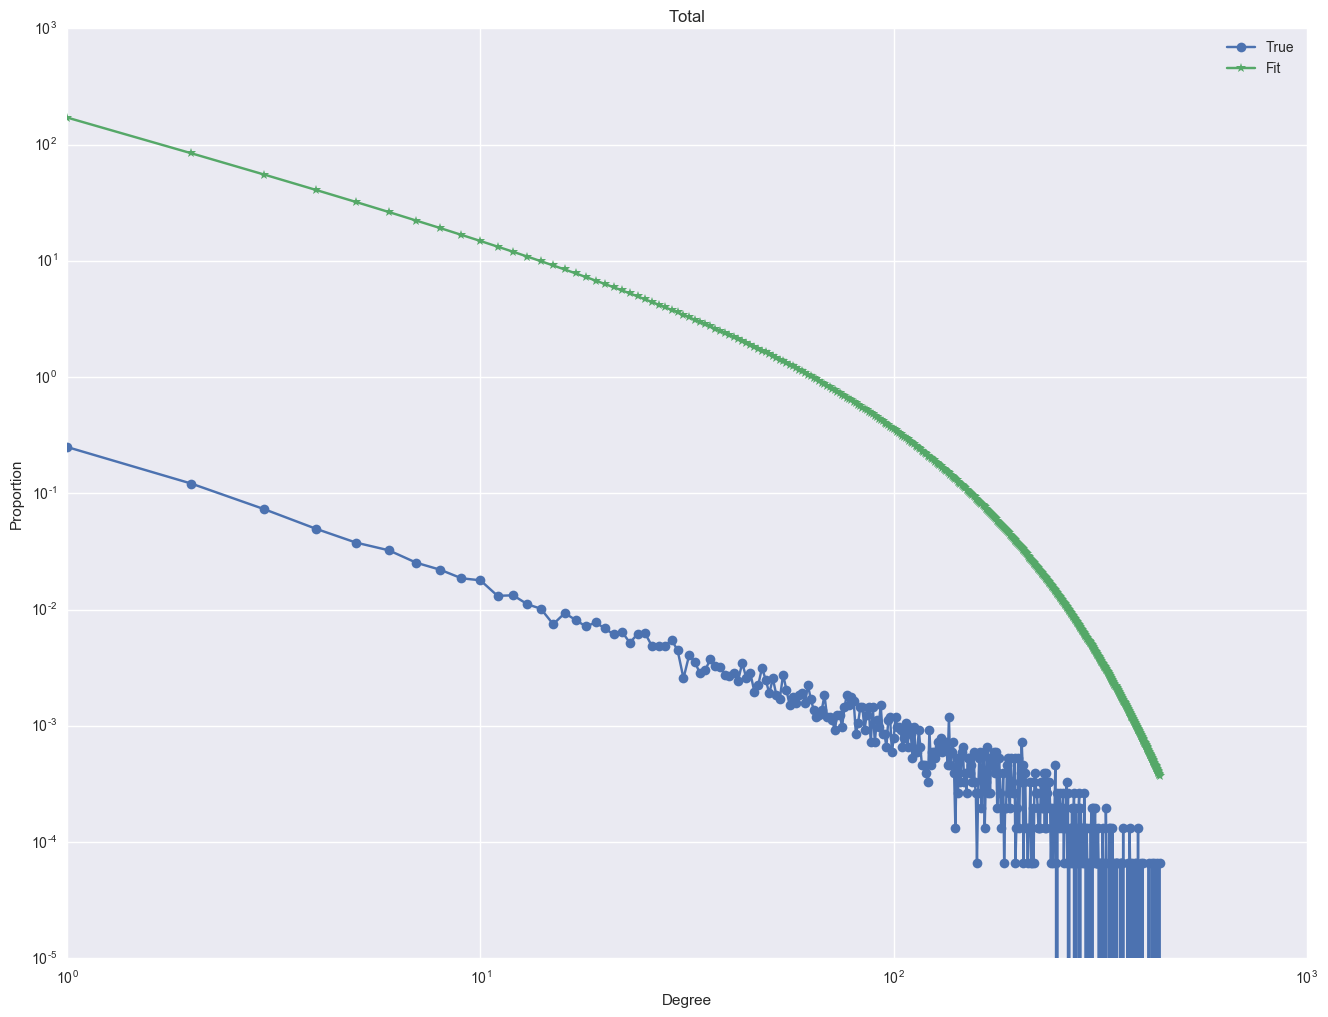

In [40]:
test_deg_counts, test_degs, test_cdf, test_ccdf, test_pdf = get_out_dists(test_directed_graph)
test_alpha, test_lambda, test_xmin,_ = utils.fit_truncated(out_deg_data)
utils.plot_fit(test_alpha, test_lambda, test_xmin, test_pdf, test_ccdf, test_degs, title="Total")

In [126]:
test_alpha

1.1423028248779337

In [78]:
atpG = utils.get_graph(atp_df)

In [97]:
snap.PlotInDegDistr(test_directed_graph, "example", "Directed graph - in-degree Distribution")

In [86]:
plot_map = snap.TIntStrH()
for p_id, p_name in names_df.itertuples(False):
    plot_map[p_id] = p_name

In [88]:
snap.DrawGViz(tempG, snap.gvlNeato, "test.png", "test graph", plot_map)

In [92]:
df.dtypes

tourney_id                    object
tourney_name                  object
surface                       object
draw_size                    float64
tourney_level                 object
tourney_date          datetime64[ns]
match_num                      int64
winner_id                      int64
winner_seed                  float64
winner_entry                  object
winner_name                   object
winner_hand                   object
winner_ht                    float64
winner_ioc                    object
winner_age                   float64
winner_rank                  float64
winner_rank_points           float64
loser_id                       int64
loser_seed                   float64
loser_entry                   object
loser_name                    object
loser_hand                    object
loser_ht                     float64
loser_ioc                     object
loser_age                    float64
loser_rank                   float64
loser_rank_points            float64
s

In [50]:
atp_directed_graph = get_directed_graph(atp_df)
print()
print("In-Degree")
atp_in_deg_data = get_in_deg_data(atp_directed_graph)
utils.print_fit_results(atp_in_deg_data, True)
print()
print("Out-Degree")
atp_out_deg_data = get_out_deg_data(atp_directed_graph)
utils.print_fit_results(atp_out_deg_data, True)

qual_directed_graph = get_directed_graph(qual_df)
print()
print("In-Degree")
qual_in_deg_data = get_in_deg_data(qual_directed_graph)
utils.print_fit_results(qual_in_deg_data, True)
print()
print("Out-Degree")
qual_out_deg_data = get_out_deg_data(qual_directed_graph)
utils.print_fit_results(qual_out_deg_data, True)

total_directed_graph = get_directed_graph(df)
print()
print("In-Degree")
total_in_deg_data = get_in_deg_data(total_directed_graph)
utils.print_fit_results(total_in_deg_data, True)
print()
print("Out-Degree")
total_out_deg_data = get_out_deg_data(total_directed_graph)
utils.print_fit_results(total_out_deg_data, True)
        

()
In-Degree
alpha: 4.89008231073
x_min: 441.0
Number of Data Points: 4272


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|                       |    power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -0.20,0.683 |  0.01,0.993 |    -0.23,0.500    |      -0.21,0.672      |
|   lognormal_positive  |  0.20,0.683 |  0.00,1.000 |  0.21,0.730 |    -0.02,0.622    |      -0.01,0.654      |
|      exponential      | -0.01,0.993 | -0.21,0.730 |  0.00,1.000 |    -0.24,0.705    |      -0.22,0.503      |
|  truncated_power_law  |  0.23,0.500 |  0.02,0.622 |  0.24,0.705 |     0.00,1.000    |       0.01,0.712      |
| stretched_exponential |  0.21,0.672 |  0.01,0.654 |  0.22,0.503 |    -0.01,0.712    |       0.00,1.000      |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -1.68,0.224 | -1.75,0.084 |    -1.62,0.072    |      -1.96,0.202      |
|   lognormal_positive  | 1.68,0.224 |  0.00,1.000 | -0.06,0.874 |     0.06,0.909    |      -0.28,0.144      |
|      exponential      | 1.75,0.084 |  0.06,0.874 |  0.00,1.000 |     0.12,0.422    |      -0.22,0.508      |
|  truncated_power_law  | 1.62,0.072 | -0.06,0.909 | -0.12,0.422 |     0.00,1.000    |      -0.34,0.617      |
| stretched_exponential | 1.96,0.202 |  0.28,0.144 |  0.22,0.508 |     0.34,0.617    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+--------------+--------------+-------------------+-----------------------+
|                       |    power    |  lognormal   | exponential  | power with cutoff | stretched exponential |
+-----------------------+-------------+--------------+--------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -15.36,0.001 | -14.01,0.000 |    -12.45,0.000   |      -16.61,0.000     |
|   lognormal_positive  | 15.36,0.001 |  0.00,1.000  |  1.35,0.463  |     2.90,0.220    |      -1.25,0.046      |
|      exponential      | 14.01,0.000 | -1.35,0.463  |  0.00,1.000  |     1.56,0.005    |      -2.60,0.023      |
|  truncated_power_law  | 12.45,0.000 | -2.90,0.220  | -1.56,0.005  |     0.00,1.000    |      -4.16,0.103      |
| stretched_exponential | 16.61,0.000 |  1.25,0.046  |  2.60,0.023  |     4.16,0.103    |       0.00,1.000      |
+-----------------------+-------------+--------------+--------------+-------------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -3.90,0.074 | -3.23,0.004 |    -2.94,0.015    |      -4.21,0.063      |
|   lognormal_positive  | 3.90,0.074 |  0.00,1.000 |  0.67,0.534 |     0.96,0.438    |      -0.31,0.237      |
|      exponential      | 3.23,0.004 | -0.67,0.534 |  0.00,1.000 |     0.29,0.077    |      -0.97,0.163      |
|  truncated_power_law  | 2.94,0.015 | -0.96,0.438 | -0.29,0.077 |     0.00,1.000    |      -1.26,0.335      |
| stretched_exponential | 4.21,0.063 |  0.31,0.237 |  0.97,0.163 |     1.26,0.335    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|                       |    power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -1.44,0.334 |  0.59,0.876 |    -1.46,0.087    |      -1.46,0.329      |
|   lognormal_positive  |  1.44,0.334 |  0.00,1.000 |  2.03,0.387 |    -0.02,0.911    |      -0.02,0.840      |
|      exponential      | -0.59,0.876 | -2.03,0.387 |  0.00,1.000 |    -2.05,0.379    |      -2.05,0.043      |
|  truncated_power_law  |  1.46,0.087 |  0.02,0.911 |  2.05,0.379 |     0.00,1.000    |       0.00,0.975      |
| stretched_exponential |  1.46,0.329 |  0.02,0.840 |  2.05,0.043 |    -0.00,0.975    |       0.00,1.000      |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -8.60,0.009 | -6.66,0.000 |    -5.98,0.001    |      -9.27,0.006      |
|   lognormal_positive  | 8.60,0.009 |  0.00,1.000 |  1.94,0.282 |     2.62,0.198    |      -0.67,0.071      |
|      exponential      | 6.66,0.000 | -1.94,0.282 |  0.00,1.000 |     0.68,0.005    |      -2.61,0.022      |
|  truncated_power_law  | 5.98,0.001 | -2.62,0.198 | -0.68,0.005 |     0.00,1.000    |      -3.29,0.113      |
| stretched_exponential | 9.27,0.006 |  0.67,0.071 |  2.61,0.022 |     3.29,0.113    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+


Assuming nested distributions
Assuming nested distributions


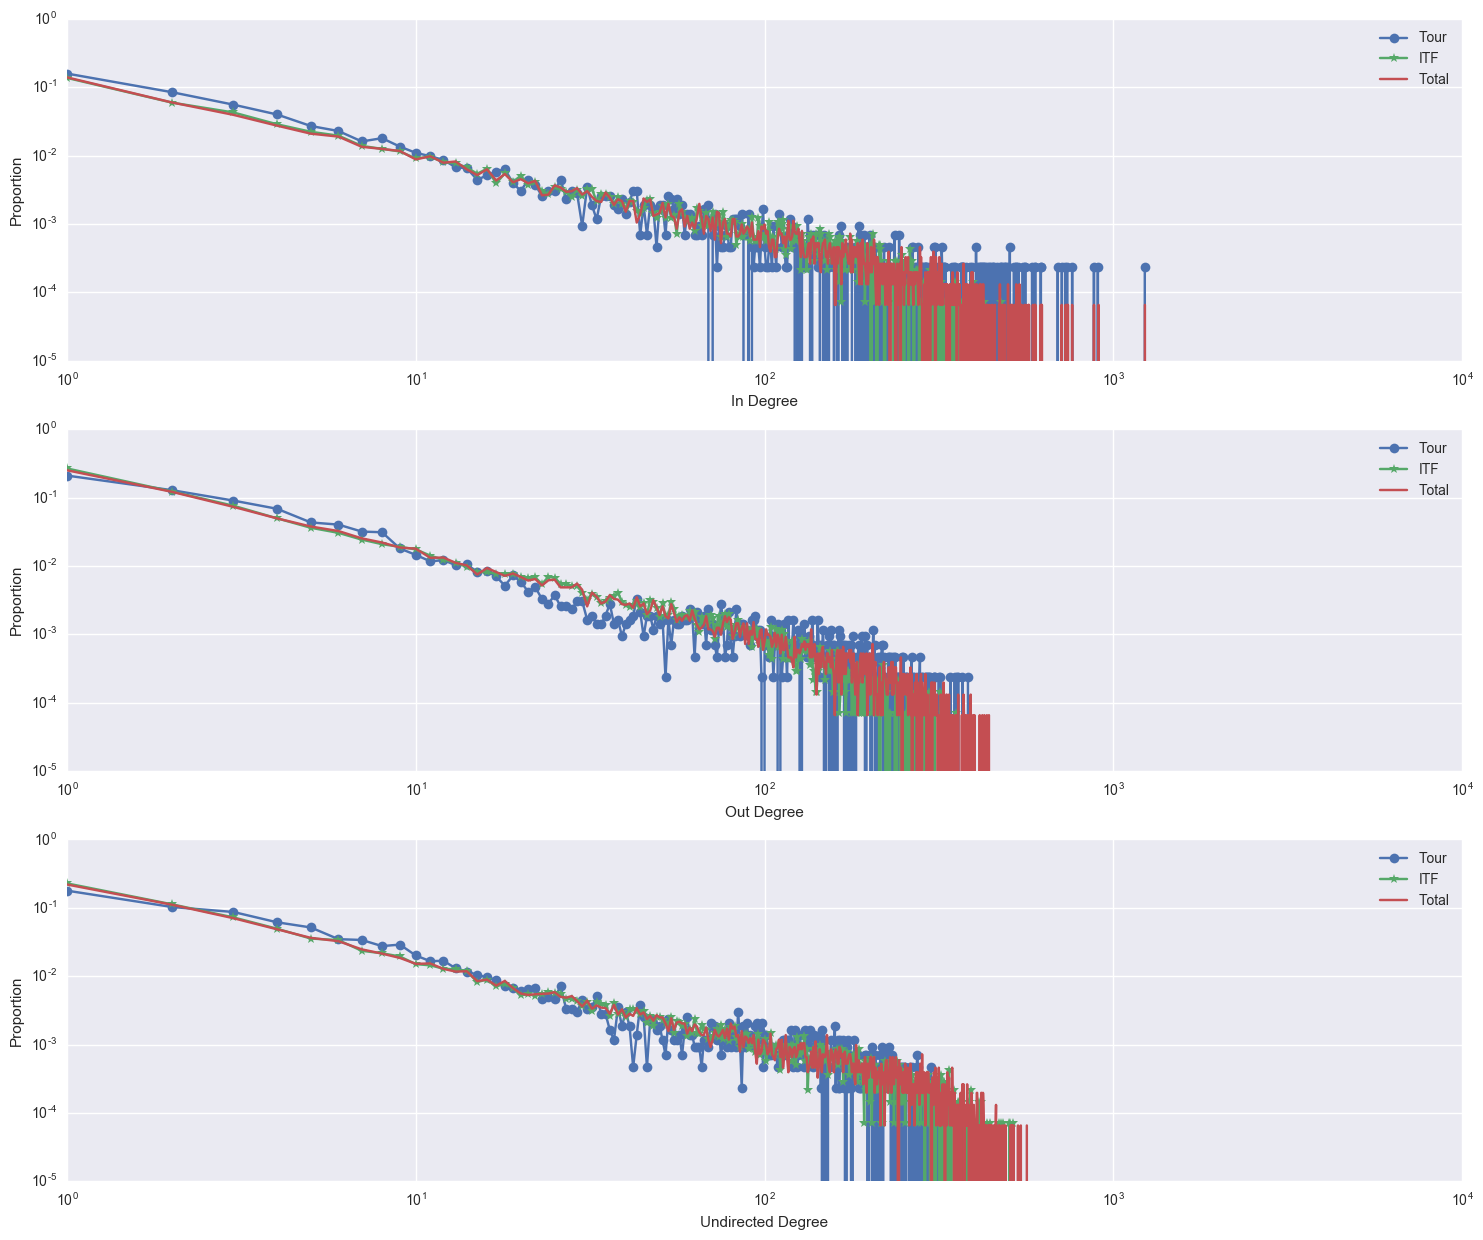

In [57]:
atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = get_in_dists(atp_directed_graph)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = get_in_dists(qual_directed_graph)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = get_in_dists(total_directed_graph)

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(311)
ax.plot(atp_degs, atp_pdf, marker='o')
ax.plot(qual_degs, qual_pdf, marker='*')
ax.plot(total_degs, total_pdf)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('In Degree')
ax.legend(['Tour', 'ITF', 'Total'])
# plt.show()

atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = get_out_dists(atp_directed_graph)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = get_out_dists(qual_directed_graph)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = get_out_dists(total_directed_graph)

ax = fig.add_subplot(312)
ax.plot(atp_degs, atp_pdf, marker='o')
ax.plot(qual_degs, qual_pdf, marker='*')
ax.plot(total_degs, total_pdf)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Out Degree')
ax.set_xlim([1,1e4])
ax.legend(['Tour', 'ITF', 'Total'])



atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_dists(atpG)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_dists(qualG)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_dists(totalG)
ax = fig.add_subplot(313)
ax.plot(atp_degs, atp_pdf, marker='o')
ax.plot(qual_degs, qual_pdf, marker='*')
ax.plot(total_degs, total_pdf)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Undirected Degree')
ax.set_xlim([1,1e4])
ax.legend(['Tour', 'ITF', 'Total'])
plt.show()


In [58]:
atp_directed_graph = get_directed_graph(atp_df)
print()
print("In-Degree")
atp_in_deg_data = get_in_deg_data(atp_directed_graph)
utils.print_fit_results(atp_in_deg_data, True)
print()
print("Out-Degree")
atp_out_deg_data = get_out_deg_data(atp_directed_graph)
utils.print_fit_results(atp_out_deg_data, True)

qual_directed_graph = get_directed_graph(qual_df)
print()
print("In-Degree")
qual_in_deg_data = get_in_deg_data(qual_directed_graph)
utils.print_fit_results(qual_in_deg_data, True)
print()
print("Out-Degree")
qual_out_deg_data = get_out_deg_data(qual_directed_graph)
utils.print_fit_results(qual_out_deg_data, True)

total_directed_graph = get_directed_graph(df)
print()
print("In-Degree")
total_in_deg_data = get_in_deg_data(total_directed_graph)
utils.print_fit_results(total_in_deg_data, True)
print()
print("Out-Degree")
total_out_deg_data = get_out_deg_data(total_directed_graph)
utils.print_fit_results(total_out_deg_data, True)

()
In-Degree
alpha: 4.89008231073
x_min: 441.0
Number of Data Points: 4272


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|                       |    power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -0.20,0.683 |  0.01,0.993 |    -0.23,0.500    |      -0.21,0.672      |
|   lognormal_positive  |  0.20,0.683 |  0.00,1.000 |  0.21,0.730 |    -0.02,0.622    |      -0.01,0.654      |
|      exponential      | -0.01,0.993 | -0.21,0.730 |  0.00,1.000 |    -0.24,0.705    |      -0.22,0.503      |
|  truncated_power_law  |  0.23,0.500 |  0.02,0.622 |  0.24,0.705 |     0.00,1.000    |       0.01,0.712      |
| stretched_exponential |  0.21,0.672 |  0.01,0.654 |  0.22,0.503 |    -0.01,0.712    |       0.00,1.000      |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -1.68,0.224 | -1.75,0.084 |    -1.62,0.072    |      -1.96,0.202      |
|   lognormal_positive  | 1.68,0.224 |  0.00,1.000 | -0.06,0.874 |     0.06,0.909    |      -0.28,0.144      |
|      exponential      | 1.75,0.084 |  0.06,0.874 |  0.00,1.000 |     0.12,0.422    |      -0.22,0.508      |
|  truncated_power_law  | 1.62,0.072 | -0.06,0.909 | -0.12,0.422 |     0.00,1.000    |      -0.34,0.617      |
| stretched_exponential | 1.96,0.202 |  0.28,0.144 |  0.22,0.508 |     0.34,0.617    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+--------------+--------------+-------------------+-----------------------+
|                       |    power    |  lognormal   | exponential  | power with cutoff | stretched exponential |
+-----------------------+-------------+--------------+--------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -15.36,0.001 | -14.01,0.000 |    -12.45,0.000   |      -16.61,0.000     |
|   lognormal_positive  | 15.36,0.001 |  0.00,1.000  |  1.35,0.463  |     2.90,0.220    |      -1.25,0.046      |
|      exponential      | 14.01,0.000 | -1.35,0.463  |  0.00,1.000  |     1.56,0.005    |      -2.60,0.023      |
|  truncated_power_law  | 12.45,0.000 | -2.90,0.220  | -1.56,0.005  |     0.00,1.000    |      -4.16,0.103      |
| stretched_exponential | 16.61,0.000 |  1.25,0.046  |  2.60,0.023  |     4.16,0.103    |       0.00,1.000      |
+-----------------------+-------------+--------------+--------------+-------------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -3.90,0.074 | -3.23,0.004 |    -2.94,0.015    |      -4.21,0.063      |
|   lognormal_positive  | 3.90,0.074 |  0.00,1.000 |  0.67,0.534 |     0.96,0.438    |      -0.31,0.237      |
|      exponential      | 3.23,0.004 | -0.67,0.534 |  0.00,1.000 |     0.29,0.077    |      -0.97,0.163      |
|  truncated_power_law  | 2.94,0.015 | -0.96,0.438 | -0.29,0.077 |     0.00,1.000    |      -1.26,0.335      |
| stretched_exponential | 4.21,0.063 |  0.31,0.237 |  0.97,0.163 |     1.26,0.335    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|                       |    power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -1.44,0.334 |  0.59,0.876 |    -1.46,0.087    |      -1.46,0.329      |
|   lognormal_positive  |  1.44,0.334 |  0.00,1.000 |  2.03,0.387 |    -0.02,0.911    |      -0.02,0.840      |
|      exponential      | -0.59,0.876 | -2.03,0.387 |  0.00,1.000 |    -2.05,0.379    |      -2.05,0.043      |
|  truncated_power_law  |  1.46,0.087 |  0.02,0.911 |  2.05,0.379 |     0.00,1.000    |       0.00,0.975      |
| stretched_exponential |  1.46,0.329 |  0.02,0.840 |  2.05,0.043 |    -0.00,0.975    |       0.00,1.000      |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -8.60,0.009 | -6.66,0.000 |    -5.98,0.001    |      -9.27,0.006      |
|   lognormal_positive  | 8.60,0.009 |  0.00,1.000 |  1.94,0.282 |     2.62,0.198    |      -0.67,0.071      |
|      exponential      | 6.66,0.000 | -1.94,0.282 |  0.00,1.000 |     0.68,0.005    |      -2.61,0.022      |
|  truncated_power_law  | 5.98,0.001 | -2.62,0.198 | -0.68,0.005 |     0.00,1.000    |      -3.29,0.113      |
| stretched_exponential | 9.27,0.006 |  0.67,0.071 |  2.61,0.022 |     3.29,0.113    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+


Assuming nested distributions
Assuming nested distributions
